# PUNTO 2 | ESFERAS 3D

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm

In [2]:
class Particle:
    
    def __init__(self, r0, v0, a0, t, m=1, radius=0.1, Id=0):  # Radio cambiado a 0.1
        
        self.dt = t[1] - t[0]
        
        
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
        
        self.p = self.m*self.v
        
        self.f = self.m*self.a
        
        # Historial
        
        self.R = np.zeros((len(t),len(r0)))
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)
        
        self.F = np.zeros_like(self.R)
        
        self.P = np.zeros_like(self.R)
    
        # Fisica
        self.K = 20.
        
        self.VEk = np.zeros(len(t))
        
        
    def Evolution(self,i):
        
        self.SetPosition(i)
        self.SetVelocity(i)
        
        self.a = self.f/self.m
        
        # Euler-Cromer
        self.v += self.dt*self.a
        self.r += self.dt*self.v
        
        
    def CalculateForce(self,p):
        
        d = np.linalg.norm(self.r - p.r)
        
        compresion = self.radius + p.radius - d
        
        if compresion >= 0:
            
            Fn = self.K * compresion**3
            
            self.n = (self.r - p.r)/d     
            self.f = np.add(self.f,Fn*self.n)
            
            
    def ResetForce(self):
        self.f[:] = 0.
        self.a[:] = 0.
    
    # Setter
    def SetPosition(self,i):
        self.R[i] = self.r
    
    def SetVelocity(self,i):
        self.V[i] = self.v
        self.P[i] = self.m*self.v
        self.VEk[i] = 0.5*self.m*np.dot(self.v,self.v)
    
    # Getter
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
 
    def GetMomentum(self,scale=1):
        return self.P[::scale]
    
    def GetKineticEnergy(self,scale=1):
        return self.VEk[::scale]

    # Modificación para un contenedor 3D
    def CheckLimits(self):
        L = 10  # Lados = 10 x 10 x 10
        for i in range(3):
            if self.r[i] + self.radius > L/2 and self.v[i] > 0.:
                self.v[i] = -self.v[i]
            elif self.r[i] - self.radius < -L/2 and self.v[i] < 0.:
                self.v[i] = -self.v[i]

In [3]:
# Modificación para generar partículas en 3D
def GetParticles(N, V, R, t):
    Particles = []
    L = V**(1/3)  # Longitud del lado del cubo
    for i in range(N):
        r0 = np.random.uniform(low=-L/2 + R, high=L/2 - R, size=3)
        v0 = np.random.randn(3)  # V0 aleatoria
        a0 = np.zeros(3)
        p = Particle(r0, v0, a0, t, m=1, radius=R, Id=i)
        Particles.append(p)
        
    return Particles                

In [4]:
dt = 0.02 # Valor modificado para que corra más rapido la simulación
tmax = 20
t = np.arange(0, tmax, dt)
N = 50
V = 1000  # Volumen del contenedor: 10^3
R = 0.1
Particles = GetParticles(N, V, R, t)

In [5]:
def RunSimulation(t,Particles):
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        
        for i in range(len(Particles)):
            for j in range(len(Particles)):
                if i!=j:
                    Particles[i].CalculateForce(Particles[j])
        
        for i in range(len(Particles)):
            Particles[i].Evolution(it)
            Particles[i].ResetForce()
            Particles[i].CheckLimits()
            
            
    return Particles

In [6]:
Particles = RunSimulation(t, Particles)

Running simulation: 100%|█████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 123.10 Steps/s]


In [7]:
scale = 50
t1 = t[::scale]

<IPython.core.display.Javascript object>


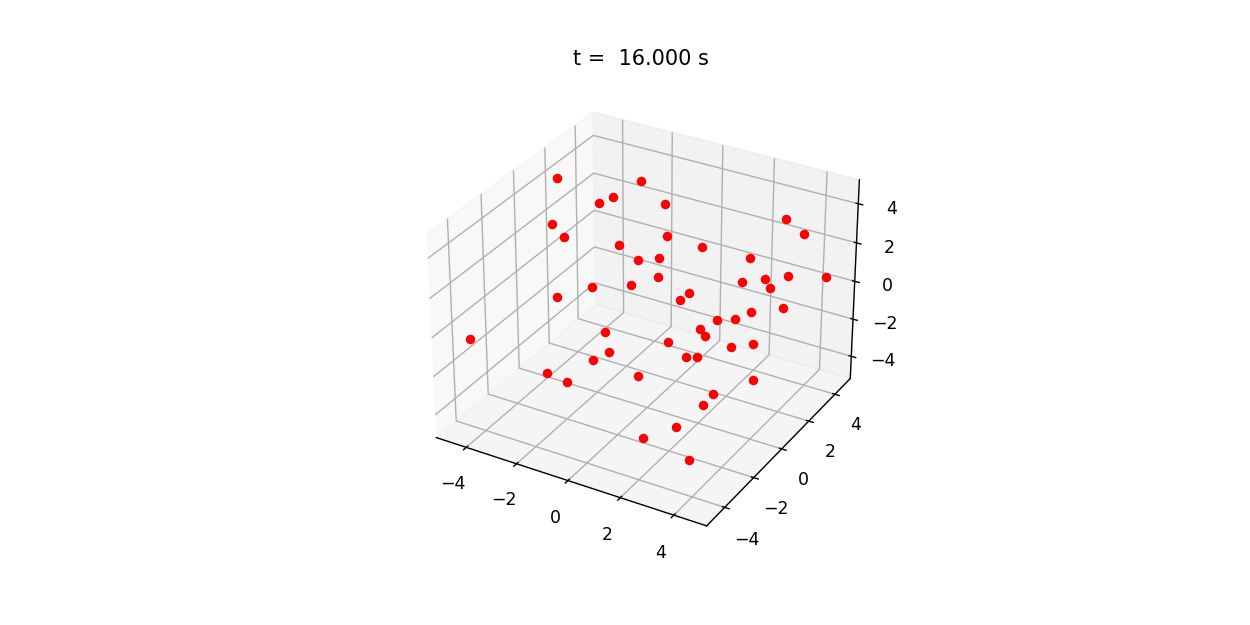

In [8]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')  # Uso de un plot 3D

def init():
    ax.clear()
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_zlim(-5, 5)

def Update(i):
    init()
    ax.set_title(r't =  %.3f s' %(t1[i]))
    for p in Particles:
        x, y, z = p.GetPosition(scale)[i]
        vx, vy, vz = p.GetVelocity(scale)[i]
        ax.scatter(x, y, z, color='r')

Animation = anim.FuncAnimation(fig, Update, frames=len(t1), init_func=init)